In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statistics as sts
import numpy as np
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.cluster import KMeans
%matplotlib inline

## 6 features

In [2]:
features_6_df = pd.read_csv('https://raw.githubusercontent.com/viniciusmioto/network_analysis/main/data/6_features_db.csv')
features_6_df = features_6_df.drop('Unnamed: 0', 1)
features_6_df

,0,1,2,3,4,5
0,239.0,1.0,2.0,4828.0,3.999178,0.000411
1,165.0,1.0,2.0,1989.0,3.998005,0.000997
2,172.0,1.0,3.0,1333.0,5.994620,0.001792
3,97.0,1.0,2.0,1277.0,3.996887,0.001556
4,217.0,1.0,1.0,5836.0,1.999773,0.000227
...,...,...,...,...,...,...
3141,23.0,1.0,0.0,320.0,1.586466,0.001194
3142,65.0,1.0,0.0,2363.0,1.629453,0.000169
3143,47.0,1.0,0.0,1466.0,1.676742,0.000271
3144,30.0,1.0,0.0,257.0,1.757974,0.001651


In [3]:
features_6_df.describe()

,0,1,2,3,4,5
count,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000
mean,465.237444,1229.139224,36.263827,3090.922759,38.210991,0.105592
std,939.385022,3206.497495,145.489091,8841.018227,145.046029,0.251411
min,1.000000,1.000000,0.000000,1.000000,0.320000,0.000010
25%,5.000000,1.000000,1.000000,4.000000,2.868990,0.000278
50%,41.000000,1.000000,2.000000,468.500000,3.998822,0.000948
75%,355.000000,104.750000,3.000000,2453.250000,5.997092,0.095238
max,7636.000000,19906.000000,989.000000,225942.000000,989.000000,1.000000


In [4]:
X_6_features = np.array(features_6_df)

In [5]:
scaler = MinMaxScaler()
scaled_6_features_X = scaler.fit_transform(X_6_features)

In [6]:
kmeans_6_features = KMeans(n_clusters=2, n_init=30)
kmeans_6_features.fit_predict(scaled_6_features_X)
kmeans_6_features.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

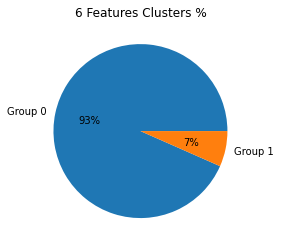

In [7]:
power_law_6f = sum(kmeans_6_features.labels_)/(len(kmeans_6_features.labels_))
data = [1 - power_law_6f, power_law_6f]
plt.pie(data, labels=['Group 0', 'Group 1'], autopct='%.0f%%')
plt.title('6 Features Clusters %')
plt.show()

## Graph2Vec

In [8]:
graph2vec_df = pd.read_csv('https://raw.githubusercontent.com/viniciusmioto/network_analysis/main/data/graph2vec_db.csv')
graph2vec_df = graph2vec_df.drop('Unnamed: 0', 1)
graph2vec_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,is_power_law
0,0.283226,-1.555381,-0.121139,0.220456,0.116647,-0.678064,1.872659,-0.676502,0.178234,1.801286,-0.665650,0.078173,-0.983346,-1.348082,-0.540847,-0.053811,-0.610999,2.146456,-0.006776,-0.924747,-0.469823,-0.700700,-0.340792,0.254332,-0.428917,0.809738,0.049616,-0.177372,-2.275054,-0.902289,-1.435698,-0.646209,0.642027,-0.422488,0.058161,0.132872,-0.160723,1.550581,1.003663,-1.235544,...,-0.470145,-0.078502,0.879602,-0.590490,0.646790,0.498324,1.016791,1.018782,-0.464928,1.835195,-0.872807,-0.976261,-0.269561,-1.683204,-0.325591,-0.318458,-0.034617,-0.502123,1.280567,0.813439,2.208925,0.589798,-0.585594,0.663595,-0.105845,-0.712773,0.385096,1.060231,0.728433,0.403087,-1.153790,1.209732,1.552829,-1.949741,2.080611,-0.703734,-1.996018,0.042010,0.412546,1
1,0.584198,-2.017837,0.498199,0.585044,0.943714,-0.814021,1.755427,-0.913293,0.779892,2.043380,0.048720,0.132257,-0.695167,-0.949858,-0.199968,0.232681,-0.869654,2.274969,-0.001600,-0.450485,0.407698,-1.081981,-0.114681,0.982609,-0.080398,0.250174,0.046967,0.271158,-1.254065,-0.431125,-0.873392,-0.682613,-0.029310,-0.143342,-0.581727,0.350579,-0.365542,1.869625,1.468321,-0.674971,...,-0.317583,0.239274,1.159502,-1.567539,-0.092970,0.004924,0.823521,1.119472,-0.739585,1.350198,-0.219639,-0.681059,0.376495,-0.939939,-0.181068,-0.673260,-0.018322,-0.506087,1.666583,0.481988,2.272324,1.294753,-0.652554,0.733464,0.147188,-0.683058,0.391918,0.769496,1.386197,0.256274,-0.387191,1.152594,1.334567,-2.393117,1.934806,-0.359636,-1.504011,-0.316761,0.316515,1
2,0.227998,-1.827693,0.342926,-0.027439,0.322606,-0.945044,2.034954,-0.301611,0.115928,1.966895,-0.471175,-0.071865,-0.989952,-1.194763,-0.622115,0.391535,-0.078218,2.079389,-0.233018,-0.984229,0.381250,-0.579963,-0.348461,0.455515,0.330299,0.329073,-0.482157,0.229686,-1.560974,-0.254917,-1.178133,-0.885855,0.354875,-0.376433,-0.224778,-0.173116,-0.693237,1.119859,1.726872,-1.483824,...,-0.154593,0.629998,1.322755,-0.902710,0.679017,0.168283,0.937681,1.308933,-0.444681,1.607754,-0.205641,-0.775442,0.216370,-1.428251,-0.886735,-0.618368,0.048050,-0.426833,1.893852,0.257605,1.159623,0.596009,-0.743968,0.298932,-0.536085,-0.984293,0.103874,0.501775,0.599790,0.317950,-0.705648,0.859727,1.433414,-2.040526,2.069890,-0.251924,-1.293017,-0.456093,0.259323,1
3,0.436618,-2.292978,1.078695,0.448068,0.685444,-0.804678,1.734705,-0.684630,0.659137,2.104952,0.161862,0.509871,-0.224656,-0.884773,0.181466,0.176759,-0.715915,1.817282,-0.145622,-1.163935,0.718997,-0.269778,-0.196568,0.734426,-0.376949,-0.086668,0.164442,0.244941,-1.366392,-0.523962,-1.033423,-0.609584,-0.366253,-0.369898,-0.547476,0.549961,-1.150980,1.556152,0.658198,-0.688094,...,-0.196946,0.200593,1.376433,-1.091689,0.141485,0.357328,1.035924,1.736181,-0.363883,1.603093,-0.298426,-0.904044,0.522272,-0.564553,0.068514,-0.415208,0.546919,-0.492946,1.899525,0.882866,2.102801,1.451428,-0.555090,0.240562,0.252116,-0.699346,0.174967,0.534152,1.307346,0.677575,-0.325053,1.330803,1.507303,-2.228408,1.818803,-0.450448,-1.572716,-0.381192,0.253463,1
4,0.139282,-1.680774,0.297711,-0.244004,0.465433,-1.256472,1.694093,-0.637881,0.695574,1.553462,0.416807,0.366108,-0.462960,-1.172405,-0.281146,0.147254,-0.701368,1.760005,-0.604829,-0.578767,-0.642436,-0.227762,0.223565,-0.283016,-0.499742,0.552941,0.177877,0.003506,-1.690982,-0.843619,-0.881816,-0.781674,-0.175499,-0.057275,0.153931,0.017539,-0.761199,1.011195,1.243130,-0.651433,...,-0.612834,0.155359,1.313796,-1.238314,0.257059,0.203198,0.831952,1.086989,-0.541909,1.934428,-0.971636,-1.134001,-0.046217,-1.221787,-0.142965,-0.852661,-0.108912,-0.439785,1.784301,0.691049,1.640730,0.691320,-0.965463,0.957317,0.085421,-1.361792,0.099702,0.338463,0.478697,0.784393,-0.569995,1.444263,

In [9]:
graph2vec_df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,is_power_law
count,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,...,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000
mean,0.461734,-1.755033,0.937906,-0.070328,0.347945,-0.902226,1.540235,-0.461834,0.238326,2.069969,0.168266,0.182680,-0.366753,-1.046448,-0.370658,-0.022156,-0.649105,1.912197,-0.102644,-0.819220,0.565888,-0.389321,-0.182027,0.274068,-0.091380,0.178095,0.103932,-0.092709,-1.328419,-0.456305,-0.913765,-0.574262,0.083586,-0.141867,-0.170644,0.219738,-0.885289,1.423250,1.259484,-0.346450,...,-0.157229,0.538130,1.047922,-1.350093,0.085355,0.021610,0.733493,1.247642,-0.245049,1.226931,-0.635230,-0.615626,0.399036,-0.870710,-0.048092,-0.429781,0.329786,-0.296937,1.644458,0.332169,1.526764,1.023430,-0.504371,0.681635,0.282318,-0.986910,-0.015980,0.347331,0.788788,0.535422,-0.272401,1.025094,1.243927,-2.117189,1.776223,-0.522603,-1.358802,-0.266086,-0.048803,0.393005
std,0.253401,0.329153,0.765420,0.249195,0.285507,0.248553,0.367646,0.239202,0.273222,0.640088,0.580406,0.237406,0.481423,0.513181,0.342513,0.267464,0.258168,0.320724,0.253942,0.241427,0.962062,0.320649,0.341869,0.394005,0.323409,0.734919,0.247676,0.269134,0.429961,0.378807,0.378125,0.241898,0.582512,0.313708,0.362874,0.467841,0.686940,0.244254,0.304255,0.548473,...,0.584712,0.651492,0.252598,0.504123,0.411111,0.433008,0.271000,0.260320,0.260491,0.560735,0.375206,0.287612,0.641443,0.809849,0.361366,0.342954,0.476531,0.346008,0.341575,0.269541,0.270585,0.563527,0.367497,0.252184,0.468444,0.242889,0.388714,0.255964,0.269268,0.242592,0.593524,0.305327,0.261333,0.265723,0.259639,0.402850,0.417423,0.409627,0.473953,0.488496
min,-0.459521,-2.658299,-0.818029,-0.958444,-0.581785,-1.794579,0.413173,-1.403550,-0.779035,0.281353,-1.260920,-0.884662,-1.632920,-2.248850,-1.498146,-0.963415,-1.483856,0.606553,-1.295619,-2.166697,-1.532145,-1.341946,-1.320616,-0.852239,-1.275880,-1.425695,-0.794424,-1.092718,-2.474953,-1.524050,-1.974749,-1.495138,-1.286221,-1.051186,-1.265998,-1.173627,-2.284731,0.438122,0.272568,-1.652124,...,-1.702483,-1.259073,0.166620,-2.443995,-1.062580,-1.082636,-0.257686,0.282976,-1.113765,-0.085571,-1.640738,-1.570109,-1.207208,-2.729151,-1.043959,-1.419870,-1.099739,-1.720557,0.462596,-0.621694,0.271635,-0.544473,-1.842945,-0.250900,-0.879438,-1.994616,-1.096558,-0.927180,-0.217446,-0.395346,-1.648848,0.022707,0.324119,-3.061946,0.752139,-1.576906,-2.788758,-1.478174,-1.285479,0.000000
25%,0.285029,-1.991864,0.429409,-0.234695,0.142199,-1.065655,1.255635,-0.615843,0.065607,1.671864,-0.233217,0.026681,-0.694408,-1.443847,-0.613409,-0.204048,-0.819463,1.682487,-0.267562,-0.965488,-0.121248,-0.627884,-0.423170,-0.040043,-0.318221,-0.435500,-0.063097,-0.283037,-1.659481,-0.748863,-1.209558,-0.734387,-0.384003,-0.379616,-0.435567,-0.091166,-1.389237,1.262484,1.035866,-0.765556,...,-0.600358,0.071408,0.886743,-1.733473,-0.228411,-0.306009,0.5449

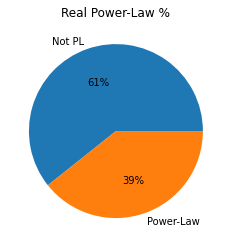

In [10]:
plt.title('Real Power-Law %')
groups = graph2vec_df['is_power_law'].value_counts() / len(graph2vec_df['is_power_law'])
plt.pie(groups, labels=['Not PL', 'Power-Law'], autopct='%.0f%%')
plt.show()

In [11]:
X_g2v = np.array(graph2vec_df.drop(['is_power_law'], 1))

In [12]:
scaler = MinMaxScaler()
scaled_X_g2v = scaler.fit_transform(X_g2v)

In [13]:
kmeans_g2v = KMeans(n_clusters=2, n_init=30)
kmeans_g2v.fit_predict(scaled_X_g2v)
kmeans_g2v.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

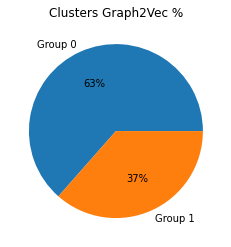

In [14]:
group1_g2v = sum(kmeans_g2v.labels_)/(len(kmeans_g2v.labels_))
data_g2v = [1 - group1_g2v, group1_g2v]
plt.pie(data_g2v, labels=['Group 0', 'Group 1'], autopct='%.0f%%')
plt.title('Clusters Graph2Vec %')
plt.show()

### accuracy

In [15]:
acc_list = []

for x in range(0, len(graph2vec_df['is_power_law'])):
  if graph2vec_df['is_power_law'].values[x] == kmeans_g2v.labels_[x]:
    acc_list.append(1)
  else:
    acc_list.append(0)

In [16]:
sum(acc_list)/len(acc_list)

0.8912559618441971

### lognormal prediction

In [17]:
lognormal_acc = acc_list[2845:-1]
sum(lognormal_acc)/len(lognormal_acc)

0.5752508361204013